# Introduction

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets list -s amazon

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

In [ ]:
!mkdir -p data/amazon
!unzip amazon-fine-food-reviews.zip -d data/amazon

In [1]:
import pandas as pd
#load the data
sample=pd.read_csv("data/amazon/Reviews.csv")

In [2]:
#check the loaded data
print(sample.shape)

(568454, 10)


In [3]:
#look of the dataset
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


/home/bruno/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

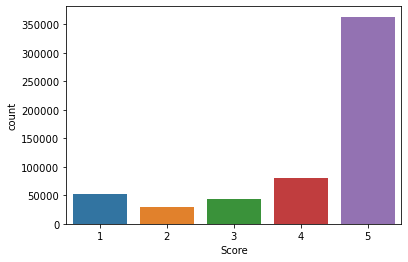

In [4]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(sample.Score)

 # Data Cleaning

In [5]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Score']
positiveNegative = actualScore.map(partition) 
sample['Score'] = positiveNegative

In [6]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# no of positive and negative reviews
sample["Score"].value_counts()
#here we can say it is a unbalanced data set

positive    486417
negative     82037
Name: Score, dtype: int64

In [8]:
#dropping  the duplicates column if any using drop duplicates from pandas
sorted_data=sample.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 10)

In [9]:
# no duplicate columns found
(final['Id'].size*1.0)/(sample['Id'].size*1.0)*100

69.29901100176971

In [10]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
# Help..Num is always less than Denom.. as Denom is people who upvote and donwvote
#Before understanding text preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

# after removing duplicate rows we found, 8346 positive and 1457 negative

(393931, 10)


positive    336824
negative     57107
Name: Score, dtype: int64

/home/bruno/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

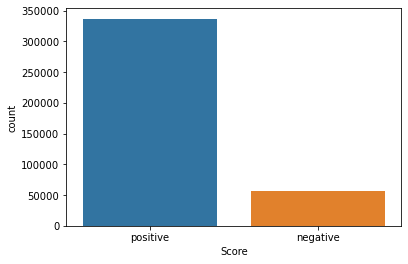

In [11]:
# After Removing Duplicate rows
import seaborn as sns
sns.countplot(final.Score)

# Text Processing

To make the text clean by removing HTML tag reviews, stopwords to segregate and adding timestamp

In [12]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

0
In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"you've", 'this', 'haven', 'should', "needn't", 'our', 'itself', 'more', 'can', 'couldn', 'all', 'few', 'me', 'were', 'own', 'm', 'very', 'shan', 'doing', 'again', 'because', "wouldn't", 'd', 'has', 'each', "don't", 'how', 'y', 'doesn', "hasn't", 'off', 'at', "aren't", 'her', 'myself', 'between', 'was', 'below', "didn't", "haven't", 'only', 'the', 'a', 'did', 'be', 'from', 'you', 'having', 'if', 'does', 'so', 'him', 'here', 'been', 're', "it's", 'than', 'he', 'some', 've', 'during', 'its', 'now', 'why', 'are', 'in', 'yourselves', 'that', "that'll", 'weren', 'while', 'don', "mightn't", 'ourselves', 'll', 'about', 'yours', 'just', 'isn', 'with', 'above', 'into', 'before', 'themselves', 'when', 'their', "shouldn't", 'but', 'after', 'yourself', 'an', 'there', 'out', 'ma', "you'd", "mustn't", 'on', "hadn't", 'wouldn', 'i', 'will', 'and', 'over', 'against', 'by', 'other', 'herself', 'no', 'himself', 'most', 'hers', 'nor', 'both', 'as', 'through', 'o', 'or', 'those', 'any', 'such', 'under', 

[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from tqdm import tqdm

In [15]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

100%|█████████████████████████████████| 393931/393931 [05:28<00:00, 1200.21it/s]


In [16]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [17]:
final.shape 

(393931, 11)

In [18]:
final.head(3) 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...


In [19]:
data_pos = final[final["Score"] == "positive"]
data_neg = final[final["Score"] == "negative"]
final = pd.concat([data_pos, data_neg])
score =final["Score"]
final.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...,get movi sound track sing along carol king gre...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme catchi illustr imagin fit righ...


In [20]:

final["Time"] = pd.to_datetime(final["Time"], unit = "s")
final= final.sort_values(by = "Time")
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
374358,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,2000-01-03,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


#  Clustering


### K means using bag of words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['CleanedText'].values)
bow.shape

(393931, 74578)

In [22]:
bow

<393931x74578 sparse matrix of type '<class 'numpy.int64'>'
	with 12547751 stored elements in Compressed Sparse Row format>

In [23]:
terms = count_vect.get_feature_names()

/home/bruno/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
terms[1:10]

['aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaagghh',
 'aaaaaaah',
 'aaaaaaahhhhhh']

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [26]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [27]:
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.22895566e-06, 7.61212019e-05, 0.00000000e+00, ...,
        4.22895566e-06, 4.22895566e-06, 4.22895566e-06],
       ...,
       [0.00000000e+00, 9.24881153e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14285714e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [30]:
silhouette_score

0.09205985174982771

In [31]:
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,2
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,2


In [32]:
df.groupby(['Bow Clus Label'])['Text'].count()

Bow Clus Label
0     12695
1     12718
2    236466
3     45755
4     11231
5      6342
6      1698
7     54060
8      8750
9      4216
Name: Text, dtype: int64

In [33]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: tea
 flavor
 tast
 like
 drink
 bag
 tri
 green
 good
 one
Cluster 1: coffe
 flavor
 like
 tast
 cup
 good
 tri
 use
 one
 drink
Cluster 2: love
 great
 good
 tast
 product
 flavor
 like
 one
 tri
 buy
Cluster 3: use
 product
 one
 make
 get
 good
 tri
 like
 great
 amazon
Cluster 4: dog
 treat
 food
 love
 like
 one
 get
 chew
 eat
 product
Cluster 5: chocol
 bar
 tast
 like
 cooki
 flavor
 one
 good
 dark
 eat
Cluster 6: tea
 green
 flavor
 tast
 like
 bag
 drink
 use
 one
 good
Cluster 7: like
 tast
 flavor
 good
 tri
 one
 realli
 great
 would
 love
Cluster 8: like
 tast
 use
 flavor
 one
 product
 water
 tri
 good
 make
Cluster 9: food
 cat
 dog
 eat
 like
 one
 dri
 tri
 get
 feed


/home/bruno/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


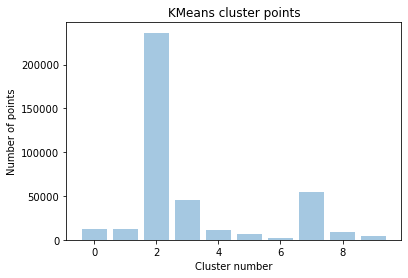

In [34]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [36]:

print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][15]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][25]]['Text'])

Corned beef hash is way too pricey at the store, so this was a good alternative option.  Even being the reduced fat version, I was impressed with the quality and taste of Hormel's brand.
______________________________________________________________________
Haven't purchased from this place yet (I'm about to order now), but I got this granola at a grocery store (higher priced than here) and it was wonderful.  About a quarter cup fills me nicely and is delicious.
______________________________________________________________________
I bought this to keep my pug mix occupied while I was out of the house. It is very durable hard plastic. I put half of her daily dog food in there when I leave and it keeps her busy for a long time! I was worried she would shake it and break something but she doesn't shake it at all. This toy is a great idea.


In [38]:

print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][10]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][25]]['Text'])

I have tried many different types of these coffee's and Newman's Own is by far superior. Strong, mellow, smooth and consistant.
______________________________________________________________________
I was looking for a nice tasting decaffeinated green tea and bought this because of the price and reputation of Good Earth.  The tea reminds me of the iced green tea sold at a national chain bread company, although theirs is sweetened. Also, through the subscribe and save option, I was able to purchase 6 boxes for the price of 1.5 boxes at my local store.<br /><br />The tea itself is delicious.  It's the lemongrass that sets it off.  It's a sweet smell.  Not at all bitter.  One of my better buys!
______________________________________________________________________
Highland Sugarworks syrup is the most delicious syrup ever.  The entire family loves it.  Rich and not too sweet.  Perfect!


In [46]:

print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][7]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][9]]['Text'])

I have not had coffee this good in a number of years. I grind my beans before I brew a pot of coffee. I store them at room temp. I am surprised and impressed by this coffee!
______________________________________________________________________
The dogs just love them and actually start barking after dinner just to get them.  They love all the flavors.  Having very few teeth, the puppy mill rescue especially loves the softer ones.
______________________________________________________________________
Love this tea!  I used to be able to pick it up at a small specialty food store in my area, but not more.  I was thrilled to be able to get it on Amazon. Just sweet enough to satisfy my "sweet tooth" without the calories!<a href="http://www.amazon.com/gp/product/B00029KOVO">MarketSpice Teabags, box of 24 (Market Spice Tea) Cinnamon-Orange</a>


In [ ]:
cluster_center_tf

In [ ]:
terms1 = tfidf_vect.get_feature_names()

In [ ]:
terms1[1:10]

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [ ]:
silhouette_score_tf

In [ ]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

In [ ]:
df1.groupby(['Tfidf Clus Label'])['Text'].count()

In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

In [ ]:
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][20]]['Text'])
    print('\n')
    print("_" * 70)

# Average Word to Vector

In [47]:
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [48]:
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [56]:

import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [57]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [62]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train,vector_size=100, workers=4)

In [63]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


/tmp/ipykernel_73330/3118248424.py:13: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(393931, 100)

# Clustering Hierarchical

In [74]:
sent_vectors.shape

(393931, 100)

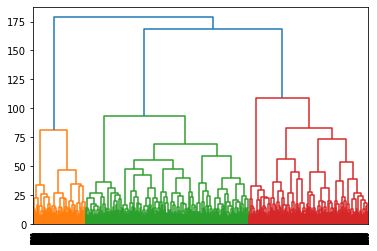

In [76]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors[:10000],method='ward'))